# Evaneszente Lichtstreuung

## initial imports

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un
import uncertainties.unumpy as unp
from scipy.signal import find_peaks,find_peaks_cwt
import scipy.signal as sig
import scipy.special as sp
import scienceplots
plt.figure()
plt.style.use('science')
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams['text.usetex'] = False # disable latex
plt.rcParams['figure.dpi'] = 150
import os
import fp

<Figure size 640x480 with 0 Axes>

In [2]:
#aliases
from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as ua
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd

In [3]:
outdir = f'plots/evaneszenz/'
datadir = f'data/evaneszenz/'
os.makedirs(outdir, exist_ok=True)

In [4]:
files1 = ['no_trap_3.avi_coord_new.txt','trap_0_80V.avi_coord_new.txt','trap_0_90V.avi_coord_new.txt', 'trap_1_00V.avi_coord_new.txt']
files2 = ['messung_1_2023-11-08_11-34-24.dat', 'messung_2_2023-11-08_11-53-21.dat', 'messung_3_2023-11-08_14-01-37.dat', 'messung_4_2023-11-08_14-17-39.dat', 'messung_5_2023-11-08_14-40-51.dat' ]

## XY Plane

In [5]:
data1 = []*len(files1)
for i, f in enumerate(files1):
    data1.append(pd.read_csv(datadir + 'part 1/' + f,sep="\t",header=None))

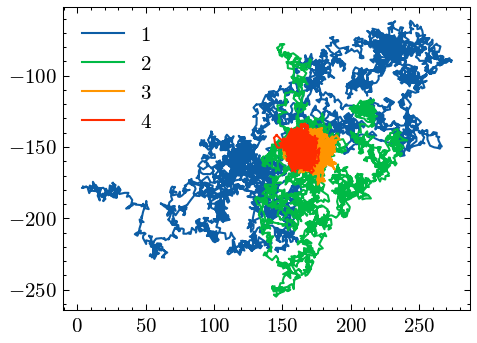

In [6]:
plt.figure()
for i, dat in enumerate(data1):
    # plt.plot(dat[0],-dat[1],label=i+1)
    dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)
    plt.plot(dat2[0],-dat2[1],label=i+1)
    # dat2.to_csv(f"{datadir}part_1_messung_{i+1}.tsv",sep="\t",header=None,index=None)

plt.legend()

## Z Movement

In [7]:
data2 = []*len(files2)
for i, f in enumerate(files2):
    data2.append(pd.read_csv(datadir + 'part 2/' +f,header=None))

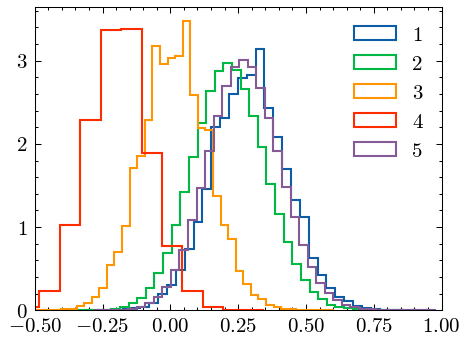

In [8]:
plt.figure()
for i, dat in enumerate(data2):
    plt.hist(dat[1],bins=40,density=True,histtype='step',label=f"{i+1}")

plt.xlim(-0.5,1)
plt.legend()